<a href="https://colab.research.google.com/github/Nanaonozare/Data-cleaning-Visualization/blob/main/Predict_Titanic_Survival1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load data
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

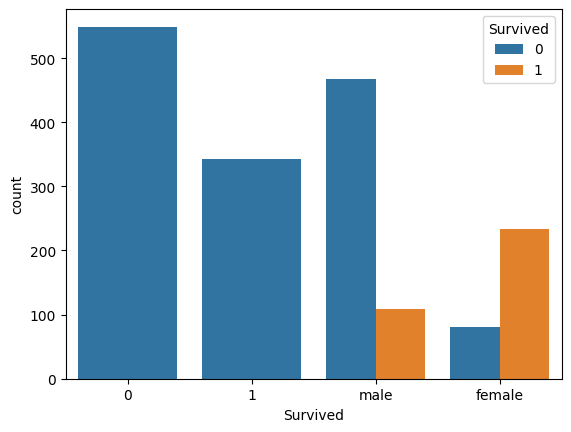

In [ ]:
sns.countplot(x='Survived', data=df)
sns.countplot(x='Sex', hue='Survived', data=df)

In [ ]:
# Drop columns we won't use
df = df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1)

In [ ]:
# Fill missing Age values with median
df['Age'] = df['Age'].fillna(df['Age'].median())

In [ ]:
# Fill missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
# Check columns after filling Embarked
print("Columns after filling Embarked:", df.columns)

Columns after filling Embarked: Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [ ]:
# Convert categorical columns
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
# Check columns after one-hot encoding
print("Columns after one-hot encoding:", df.columns)

Columns after one-hot encoding: Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


**Split Data**

In [ ]:
# Check for missing values before splitting
print("Missing values before splitting:")
print(df.isnull().sum())

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for missing values in X_train and X_test
print("Missing values in X_train:")
print(X_train.isnull().sum())
print("Missing values in X_test:")
print(X_test.isnull().sum())

Missing values before splitting:
Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64
Missing values in X_train:
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64
Missing values in X_test:
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64


**Train a Model**

In [ ]:
model = LogisticRegression(max_iter=40)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=40)

In [ ]:
predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.7821229050279329
[[89 16]
 [23 51]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.76      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [ ]:
coefficients = pd.DataFrame(model.coef_[0], X.columns, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False)

,Coefficient
Embarked_S,0.092443
Embarked_Q,0.086042
Fare,0.012549
Age,-0.000156
SibSp,-0.131955
Pclass,-0.237590
Parch,-0.264159
Sex_male,-2.462710
